In [157]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%config Completer.use_jedi = False

In [589]:
root = '/Users/haberkernh/Dropbox (HHMI)/2DstimSelection/blender4skybox/'
folder = 'unity-skybox-16h-el48_52-az250_65/'#'unity-skybox-19h-el14_05-az281_37/'# 'unity-skybox-13h-el68_25-az169_56/'#
path = root + folder
savename = '16h'

arrB = np.zeros((gradB_F.size[0],gradB_F.size[1],4))
arrG = np.zeros((gradB_F.size[0],gradB_F.size[1],4))
arrR = np.zeros((gradB_F.size[0],gradB_F.size[1],4))

arrAll = np.zeros((gradB_F.size[0],gradB_F.size[1],4,4))

In [590]:
grad_F = Image.open(path + 'SkyBox_Front.png')
grad_L = Image.open(path + 'SkyBox_Left.png')
grad_R = Image.open(path + 'SkyBox_Right.png')
grad_B = Image.open(path + 'SkyBox_Back.png')
arrAll[:,:,:,2] = np.array(grad_F)
arrAll[:,:,:,3] = np.array(grad_L)
arrAll[:,:,:,0] = np.array(grad_B)
arrAll[:,:,:,1] = np.array(grad_R)

gradB_F = Image.open(path + 'SkyBox_Front_blue.tif')
gradG_F = Image.open(path + 'SkyBox_Front_green.tif')
gradR_F = Image.open(path + 'SkyBox_Front_red.tif')
arrB[:,:,2] = np.array(gradB_F)
arrG[:,:,2] = np.array(gradG_F)
arrR[:,:,2] = np.array(gradR_F)

gradB_L = Image.open(path + 'SkyBox_Left_blue.tif')
gradG_L = Image.open(path + 'SkyBox_Left_green.tif')
gradR_L = Image.open(path + 'SkyBox_Left_red.tif')
arrB[:,:,3] = np.array(gradB_L)
arrG[:,:,3] = np.array(gradG_L)
arrR[:,:,3] = np.array(gradR_L)

gradB_B = Image.open(path + 'SkyBox_Back_blue.tif')
gradG_B = Image.open(path + 'SkyBox_Back_green.tif')
gradR_B = Image.open(path + 'SkyBox_Back_red.tif')
arrB[:,:,0] = np.array(gradB_B)
arrG[:,:,0] = np.array(gradG_B)
arrR[:,:,0] = np.array(gradR_B)

gradB_R = Image.open(path + 'SkyBox_Right_blue.tif')
gradG_R = Image.open(path + 'SkyBox_Right_green.tif')
gradR_R = Image.open(path + 'SkyBox_Right_red.tif')
arrB[:,:,1] = np.array(gradB_R)
arrG[:,:,1] = np.array(gradG_R)
arrR[:,:,1] = np.array(gradR_R)

In [591]:
BGvalue = arrB.astype(int) + arrG.astype(int)
BGvalue = (BGvalue/2).astype(int)

In [592]:
horizon = int(gradB_F.size[1]/2)
vminval= 180

meanBG = np.mean(arrAll[:horizon,:,1:,:],axis=2)

Brescaled = arrAll[:horizon,:,2,:]
Brescaled = (Brescaled[:,:,:] -np.min(Brescaled[:,:,:]))
Brescaled = 255*(Brescaled/np.max(Brescaled[:,:,:]))

Grescaled = arrAll[:horizon,:,1,:]
Grescaled = (Grescaled[:,:,:] -np.min(Grescaled[:,:,:]))
Grescaled = 255*(Grescaled/np.max(Grescaled[:,:,:]))

Rrescaled = arrAll[:horizon,:,0,:]
Rrescaled = (Rrescaled[:,:,:] -np.min(Rrescaled[:,:,:]))
Rrescaled = 255*(Rrescaled/np.max(Rrescaled[:,:,:]))

contrastBG = (Rrescaled-Brescaled)/(Rrescaled+Brescaled)
contrastBG = (contrastBG[:,:,:]-np.min(contrastBG[:,:,:]))
contrastBG = (255*(contrastBG/np.max(contrastBG[:,:,:]))).astype(int)

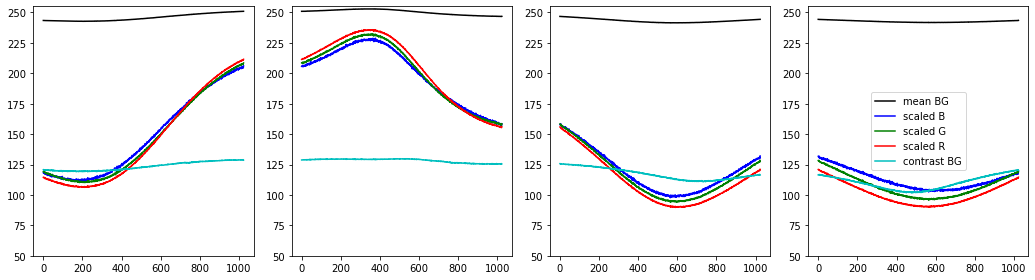

In [593]:
fig, axs = plt.subplots(1,4,figsize=(14.5,4))
for i in range(4):
    axs[i].plot(np.mean(meanBG[:,:,i],axis=0),'k', label="mean BG")
    axs[i].plot(np.mean(Brescaled[:,:,i],axis=0),'b', label="scaled B")
    axs[i].plot(np.mean(Grescaled[:,:,i],axis=0),'g', label="scaled G")
    axs[i].plot(np.mean(Rrescaled[:,:,i],axis=0),'r', label="scaled R")
    axs[i].plot(np.mean(contrastBG[:,:,i],axis=0),'c', label="contrast BG")
    axs[i].set_ylim(50,255)
axs[i].legend()
fig.tight_layout()
fig.savefig('gradientComparison_average_{}.pdf'.format(savename))

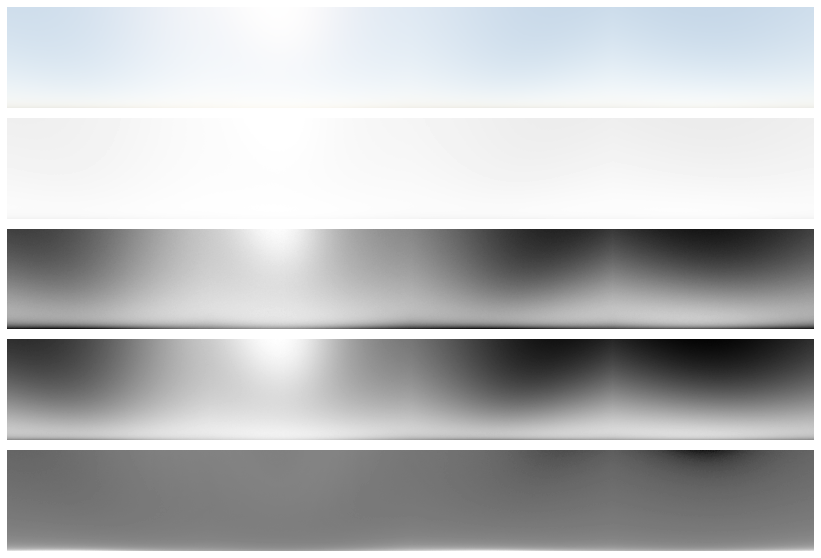

In [594]:
fig, axs = plt.subplots(5,4, figsize=(14.5,10))
for i in range(4):
    axs[0,i].imshow(arrAll[:horizon,:,:,i].astype(int))
    axs[1,i].imshow(meanBG[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[2,i].imshow(Brescaled[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[3,i].imshow(Grescaled[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[4,i].imshow(contrastBG[:,:,i], vmin=0,vmax=255,  cmap='gray') #vmin=0,vmax=254,

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=-0.01, hspace=0.1)
fig.savefig('gradientComparison_original_{}.pdf'.format(savename))

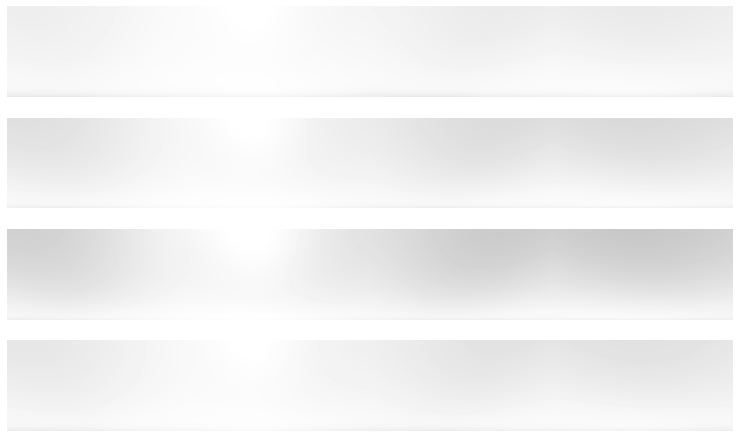

In [595]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=0,vmax=254, cmap='gray')

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('gradientComparison_grey_{}.pdf'.format(savename))

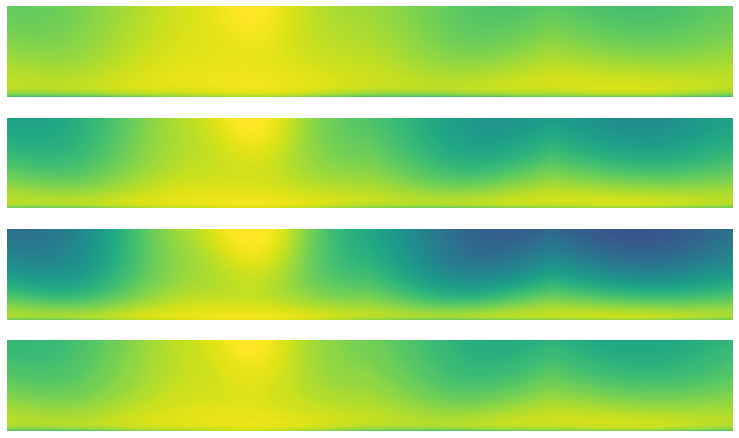

In [596]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=vminval,vmax=254)
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=vminval,vmax=254)
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=vminval,vmax=254)
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=vminval,vmax=254)

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('gradientComparison_{}.pdf'.format(savename))

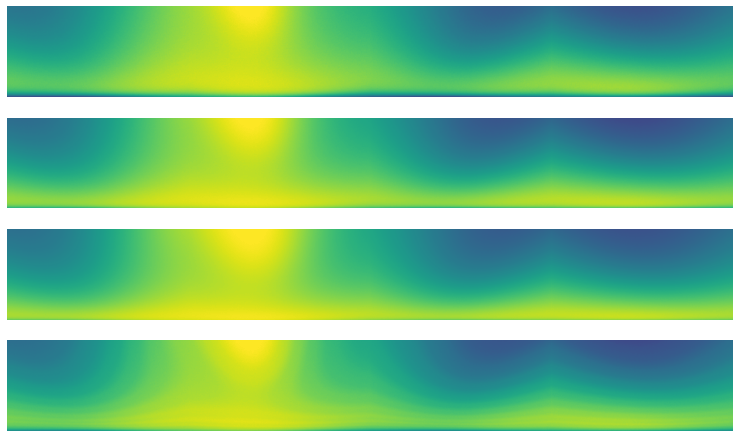

In [597]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=vminval+45,vmax=254)
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=vminval+25,vmax=254)
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=vminval,vmax=254)
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=vminval+35,vmax=254)

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)

fig.savefig('gradientComparison_norm_{}.pdf'.format(savename))